In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 'age' between 20 and 60
df['age'] = np.random.randint(20, 61, size=len(df))

# Generate 'income' between 30000 and 150000
df['income'] = np.random.randint(30000, 150001, size=len(df))

# Create 'buy_house' column based on age and income
# People over 30 have 70% chance to buy, others 30%
df['buy_house'] = df['age'].apply(lambda x: np.random.choice([1, 0], p=[0.7, 0.3]) if x > 30 else np.random.choice([1, 0], p=[0.3, 0.7]))

# Show the updated dataset
df[['age', 'income', 'buy_house']].head()


,age,income,buy_house
0,58,84693,0
1,48,56962,1
2,34,58295,1
3,27,43807,0
4,40,72348,1


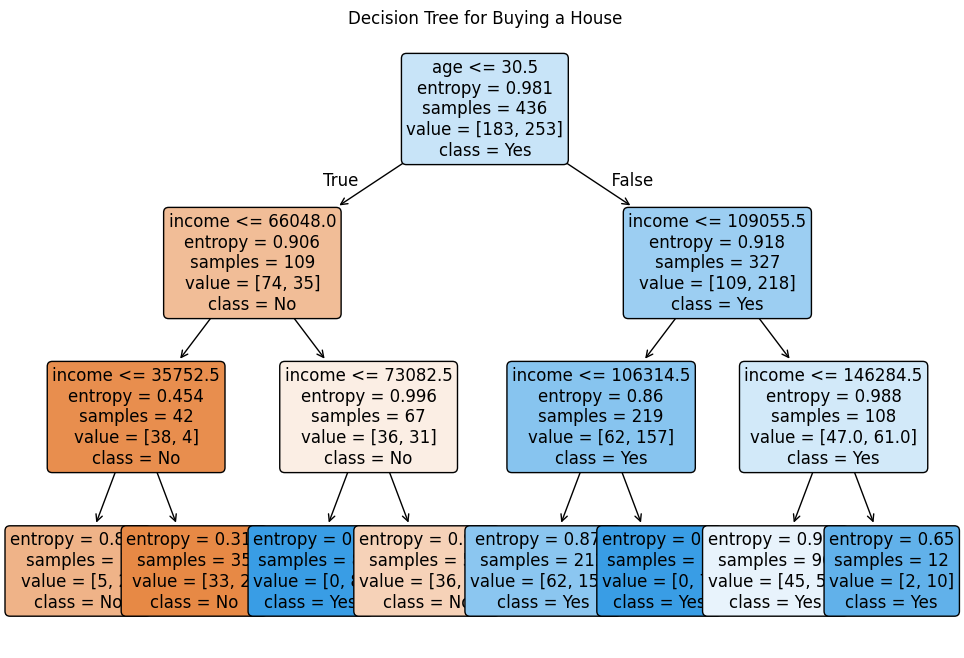

|--- age <= 30.50
|   |--- income <= 66048.00
|   |   |--- income <= 35752.50
|   |   |   |--- class: 0
|   |   |--- income >  35752.50
|   |   |   |--- class: 0
|   |--- income >  66048.00
|   |   |--- income <= 73082.50
|   |   |   |--- class: 1
|   |   |--- income >  73082.50
|   |   |   |--- class: 0
|--- age >  30.50
|   |--- income <= 109055.50
|   |   |--- income <= 106314.50
|   |   |   |--- class: 1
|   |   |--- income >  106314.50
|   |   |   |--- class: 1
|   |--- income >  109055.50
|   |   |--- income <= 146284.50
|   |   |   |--- class: 1
|   |   |--- income >  146284.50
|   |   |   |--- class: 1



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target
X = df[['age', 'income']]
y = df['buy_house']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['age', 'income'], class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree for Buying a House')
plt.show()

# Print tree rules
tree_rules = export_text(clf, feature_names=['age', 'income'])
print(tree_rules)
